In [7]:
import csv

import numpy as np
import sklearn
from sklearn.datasets import make_classification
import warnings
import pandas as pd
import argparse
import sys
from io import StringIO
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statistics
from IPython.core.display import HTML

Read from DAT

In [2]:
batches = list()
dataBatches = []
for i in range(1,11):
    batch1="globalDatasets/gas/batch"+str(i)+".dat"

    print("Reading Dataset Batch" + str(i))
    with open(batch1) as f:
        data = f.readlines()
    dataS = []
    for lines in data:
        dataS.append(lines.replace(";", " "))
    df = pd.read_csv(StringIO(dataS[0]),
                     sep="\s+",  # separator whitespace
                     header=None)


    for n in range(1,len(dataS)):
        tmp = pd.read_csv(StringIO(dataS[n]),
                          sep="\s+",  # separator whitespace
                          header=None)
        df=pd.concat([df,tmp])

    for c in df.columns.values:
       if c > 1:
            df[c] = df[c].apply(lambda x: float(str(x).split(':')[1]))
    dataBatches.append(df)

Reading Dataset Batch1
Reading Dataset Batch2
Reading Dataset Batch3
Reading Dataset Batch4
Reading Dataset Batch5
Reading Dataset Batch6
Reading Dataset Batch7
Reading Dataset Batch8
Reading Dataset Batch9
Reading Dataset Batch10


SAVE FROM DAT TO CSV

In [6]:
#for i in range(0,10):
#    batchName="globalDatasets/gas/batch"+str(i+1)+".csv"
#    dataBatches[i].to_csv(batchName,index=False)

In [3]:
batches = pd.concat([dataBatches[0],dataBatches[1],dataBatches[9]])
batches = pd.concat([dataBatches[0],dataBatches[1],dataBatches[2],dataBatches[3],dataBatches[7],dataBatches[8],dataBatches[9]])

In [4]:
batches=dataBatches[0]
for i in range(1,10):
    batches = pd.concat([batches,dataBatches[i]])

In [4]:
rah = ["y"]
for i in range(1,batches.columns[-1]+1):
    nam = "x"+str(i)
    rah.append(nam)

In [5]:
batches= batches.set_axis(rah, axis='columns')

In [6]:
batches = batches.apply(pd.to_numeric)
batches.to_csv("batches1-4_8-10.csv",index=False)

In [13]:
import arff
arff.dump('batch1-2-10.arff.arff'
      , batches.values
      , relation='relation name'
      , names=batches.columns)

In [2]:
dataBatches = []
for i in range(0,10):
    batchName="globalDatasets/gas/batch"+str(i+1)+".csv"
    dataBatches.append(pd.read_csv(batchName))

In [63]:
classes = []
for i in range(1,8):
    classes.append([])
for i in range(0,10):
    for j in range(1,7):
        classes[j].append(round((dataBatches[i].iloc[:,0].tolist().count(j)/dataBatches[i].iloc[:,0].count())*100,2))

In [71]:
df = pd.DataFrame(classes[1], columns=['Gas1'])


<h1>TEST RESULTS</h1>


In [2]:
def scores(textfile,titl,metric):
    with open(source+textfile) as f:
        lines = f.readlines()
    metrc = []
    for i in range(2,len(lines)):
        currLine = lines[i].replace(", \n","")
        currLine = currLine.replace(",","")
        values=currLine.split()
        if metric=="pmauc":
            metrc.append(values[0])
        elif metric=="wauc":
            metrc.append(values[1])
        elif metric=="ewauc":
            metrc.append(values[2])
        else:
            metrc.append(values[3])
    metrc=pd.to_numeric(metrc)*100

    vals = pd.DataFrame(list(zip(metrc)),
                   columns =[titl])
    return vals



def plot_scores(vals,titl):
    fig = px.line(vals)
    fig.update_layout(
        yaxis = dict(
            title="Score",
            ticksuffix= "%"
        ),
        xaxis = dict(
            title="Run num"
        ),
        title=titl
    )        
    fig.show()
    
import plotly.graph_objects as go

def box_show(vals):
    fig = go.Figure()

    for col in vals:
      fig.add_trace(go.Box(y=vals[col].values, name=vals[col].name))

    fig.show()

In [3]:
#source = "Testes/"
#source = "Testes/100 runs/"
sources = ["Testes/window50newhybrid/",
           "Testes/window200newhybrid/",
           "Testes/window100newhybrid/"
          ]

In [35]:
filesToRead = [
"_12_12_ir37_sev_0.5.txt",
"_12_12_ir37_sev_1.txt",
"_12_12_ir37_sev_0.3.txt",
"_12_12_ir19_sev_0.5.txt",
"_12_12_ir19_sev_1.txt",
"_12_12_ir19_sev_0.1.txt",
"_batches1-4_8-10.txt",
"_batches.txt"
]
modesTested = [
    "MOOB",
    "MUOB",
    "HYBRID",
    "MOOB_delayed",
    "MUOB_delayed"
]

titlesToPrint = [
"Gaussian - 12 Major 12 Minor Classes - 3 to 7 IR - Severity 0.5",
"Gaussian - 12 Major 12 Minor Classes - 3 to 7 IR - Severity 1",
"Gaussian - 12 Major 12 Minor Classes - 3 to 7 IR - Severity 0.3",
"Gaussian - 12 Major 12 Minor Classes - 1 to 9 IR - Severity 0.5",
"Gaussian - 12 Major 12 Minor Classes - 1 to 9 IR - Severity 1",
"Gaussian - 12 Major 12 Minor Classes - 1 to 9 IR - Severity 0.1",
"Real world data batches 1-4 and 8-10",
"Real world data ALL batches"
]

rowNames = [
"3/7 Sev 0.5",
"3/7 Sev 1",
"3/7 Sev 0.3",
"1/9 Sev 0.5",
"1/9 Sev 1",
"1/9 Sev 0.1",
"RW batches",
"RW ALL"
]

numFiles = len(filesToRead)
numModes = len(modesTested)

PRINT ALL RESULTS IN "TESTES" FOLDER

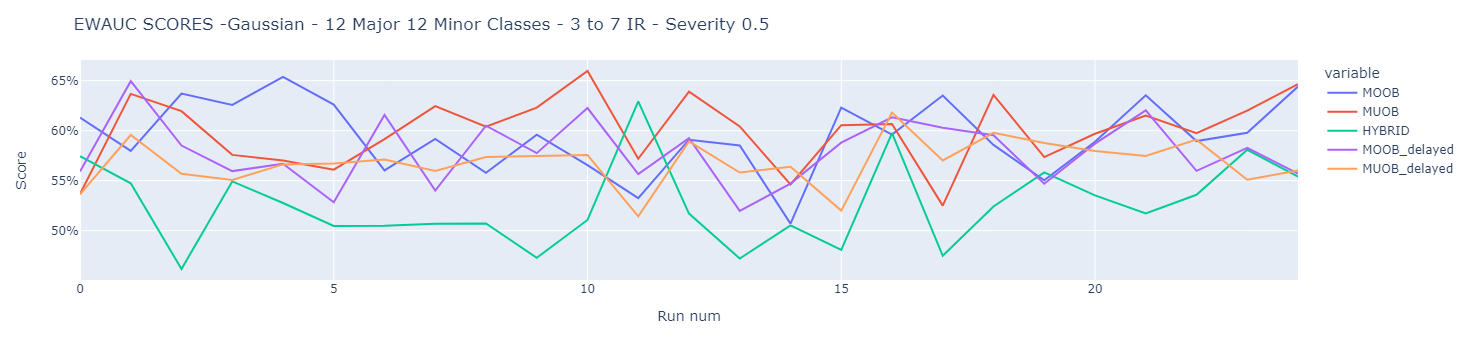

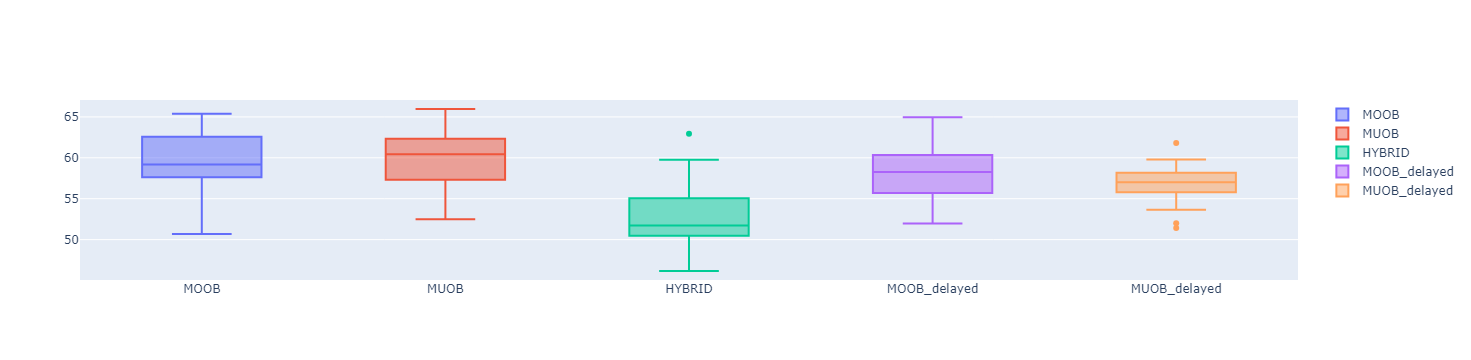

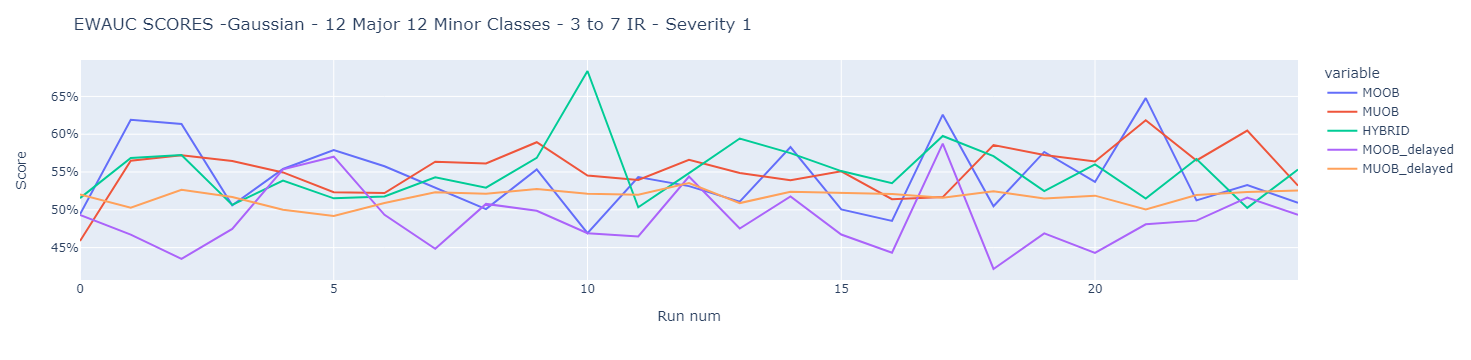

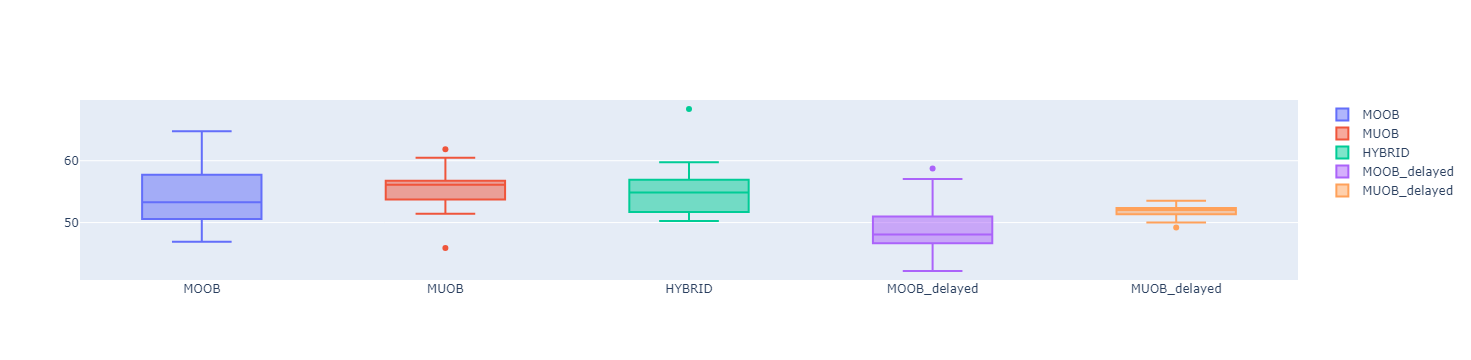

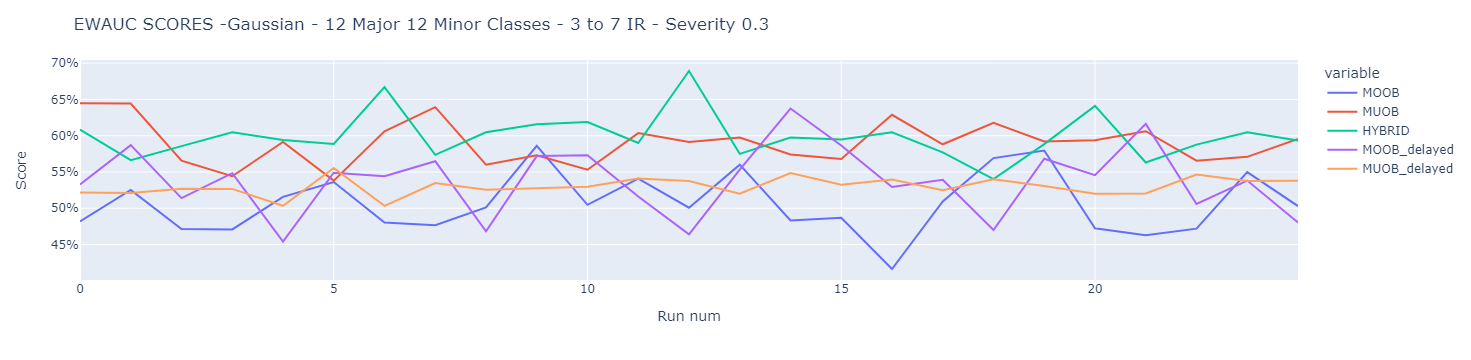

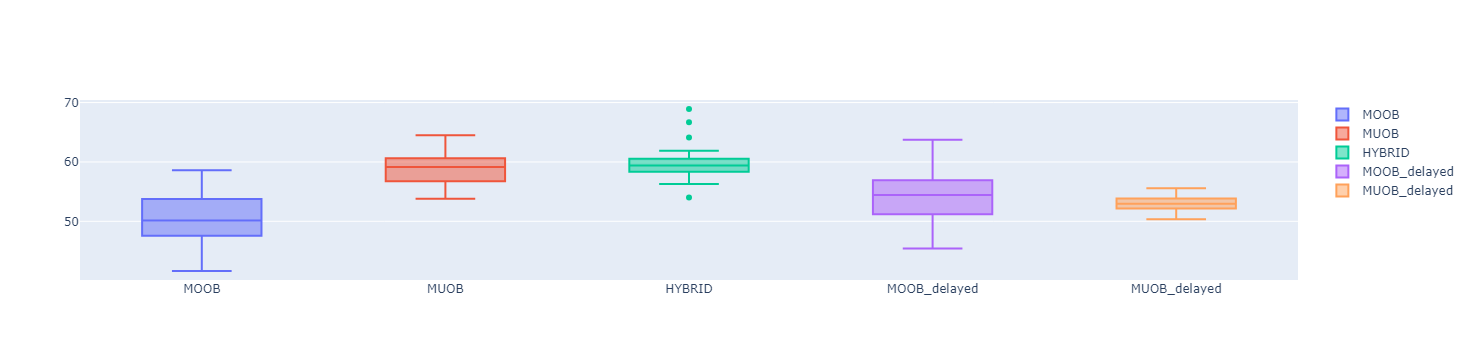

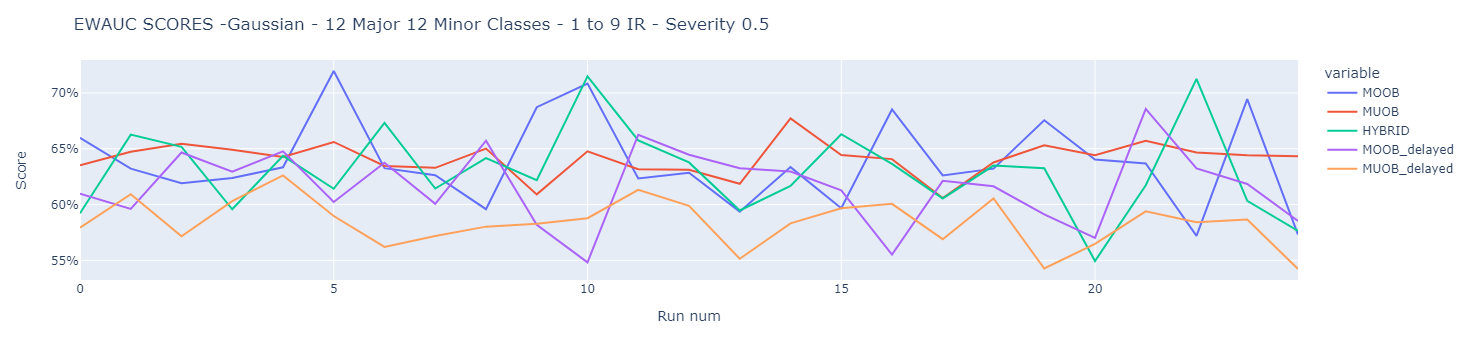

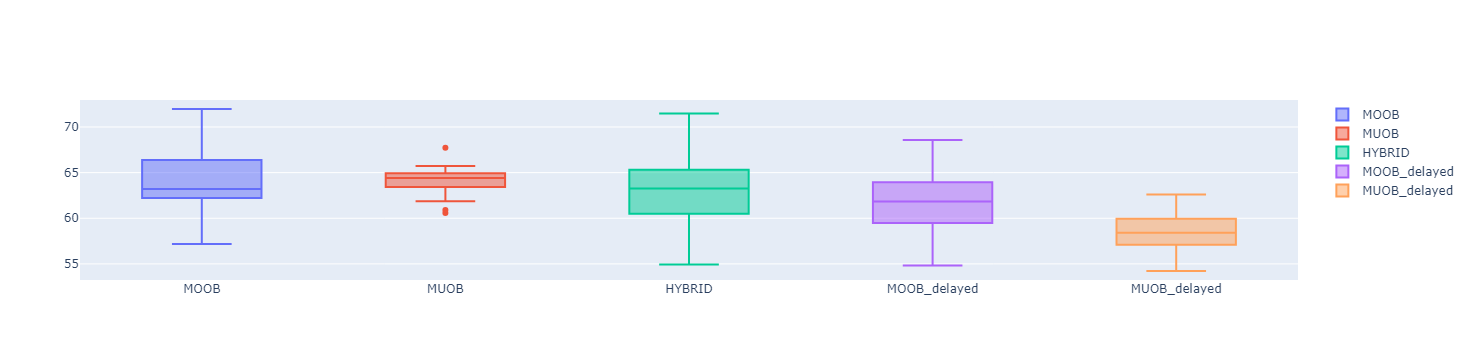

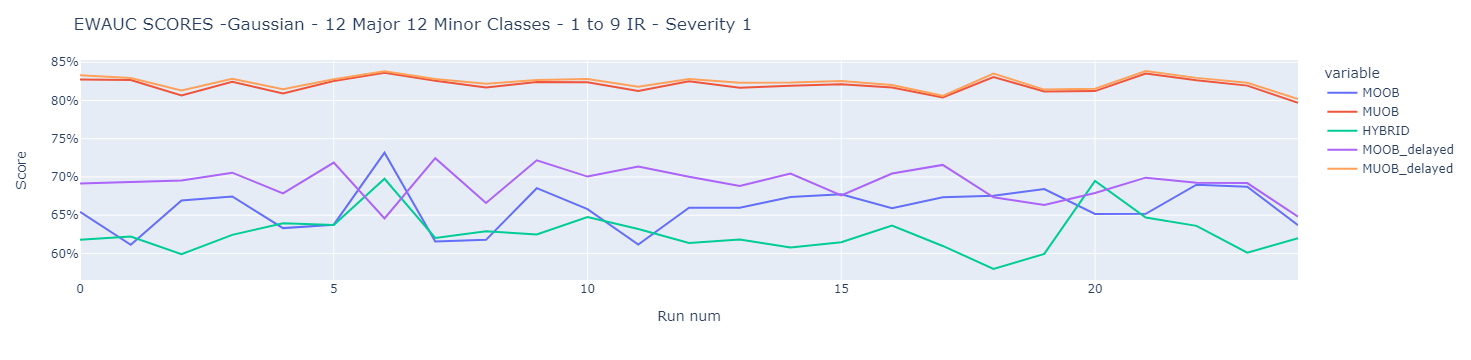

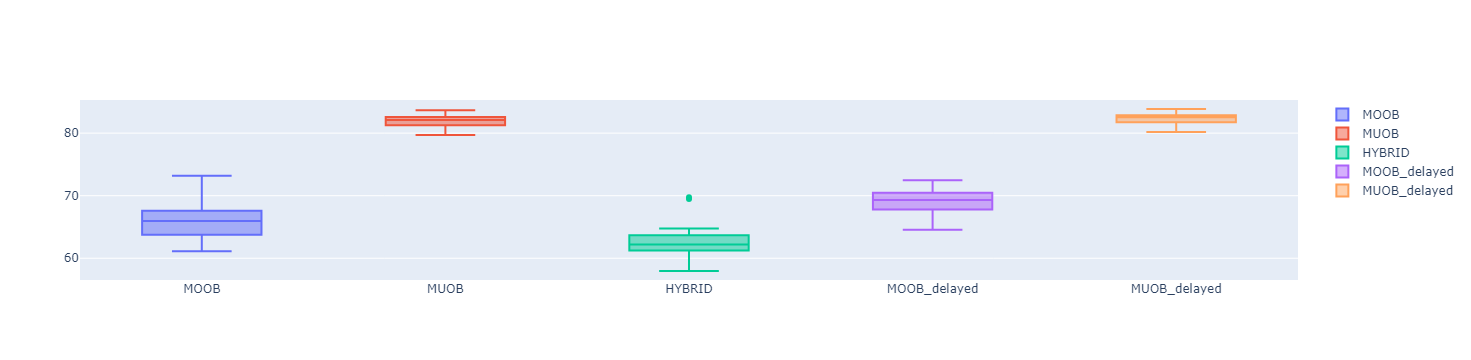

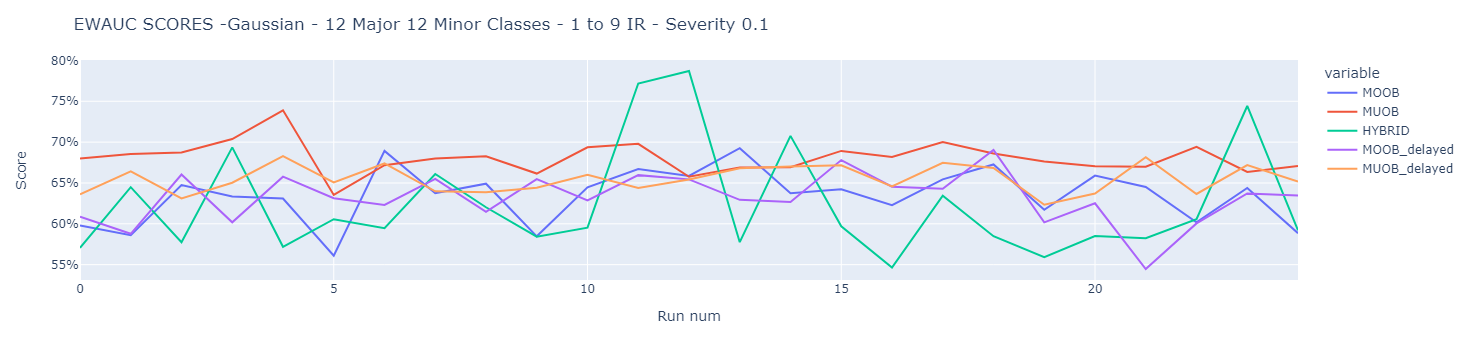

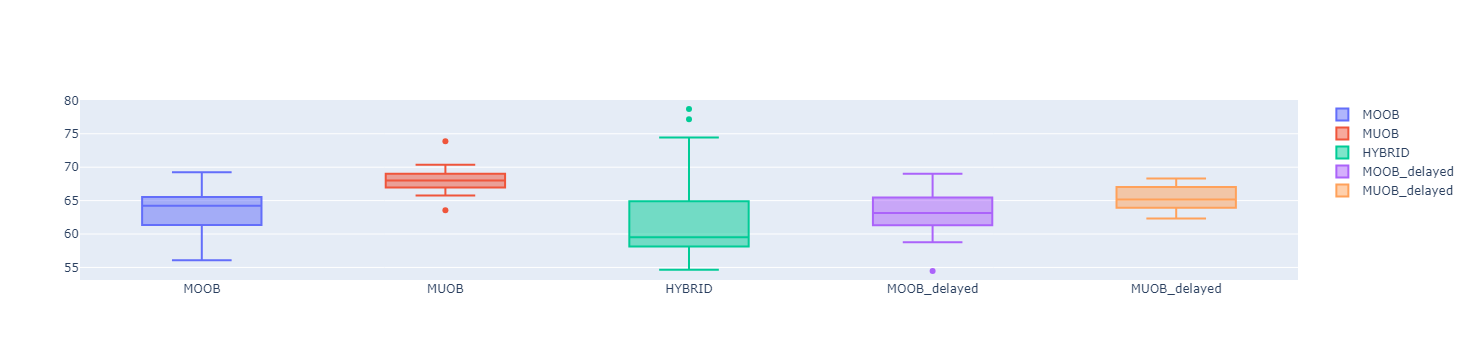

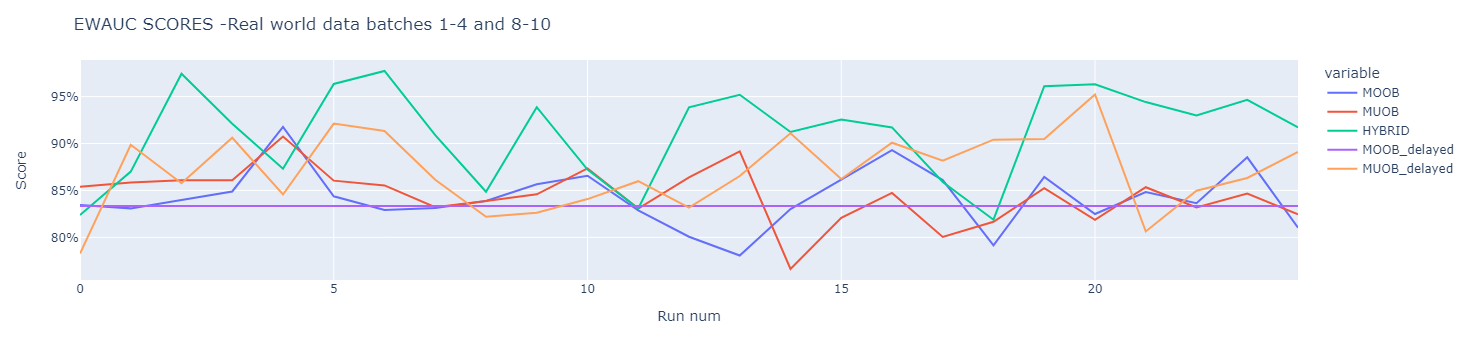

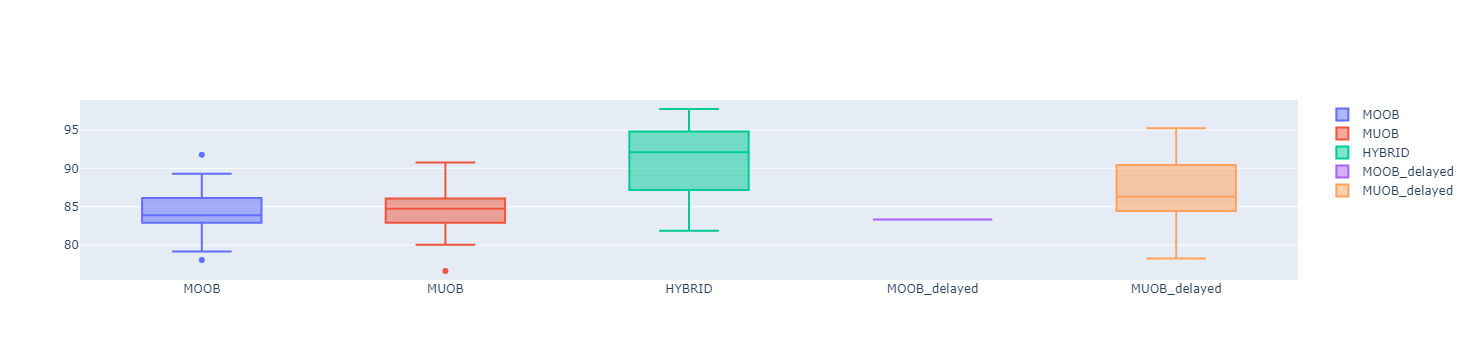

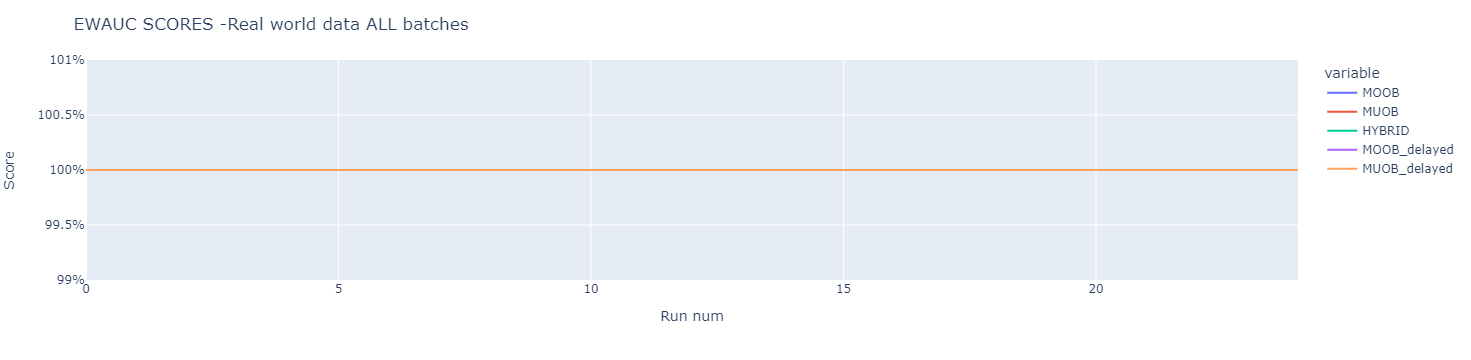

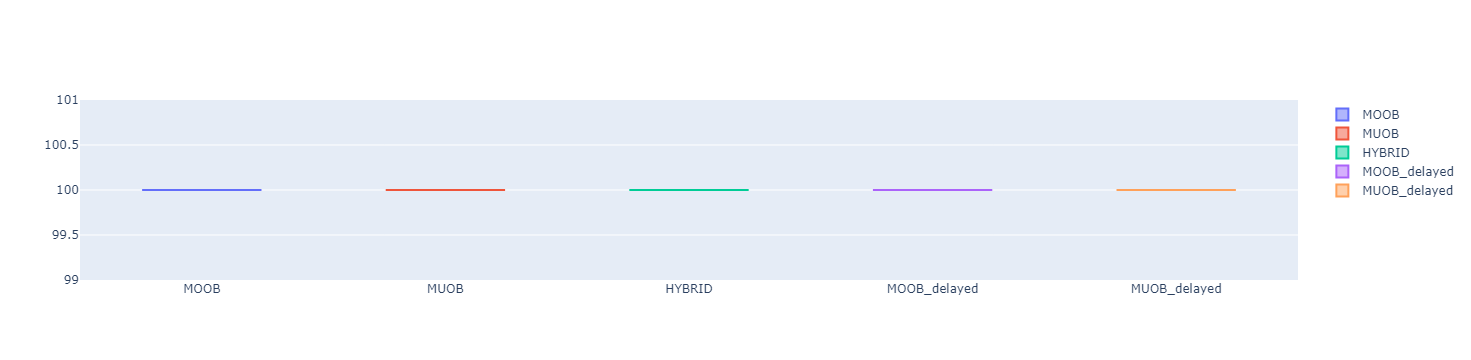

                  MOOB       MUOB     HYBRID MOOB_delayed MUOB_delayed
3/7 Sev 0.5  59.174327   60.42181  51.728447    58.274596    57.020468
3/7 Sev 1    53.288517   56.13019  54.846634    48.079642    52.013487
3/7 Sev 0.3  50.128866  59.143703  59.413825     54.42547    52.964983
1/9 Sev 0.5  63.219351  64.416929   63.26229    61.840816    58.405782
1/9 Sev 1    65.960561   82.11535  62.199949    69.301415    82.543644
1/9 Sev 0.1  64.238914  68.004762  59.528357    63.132844    65.170028
RW batches    83.87817  84.740392  92.104052    83.333333    86.331503
RW ALL           100.0      100.0      100.0        100.0        100.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


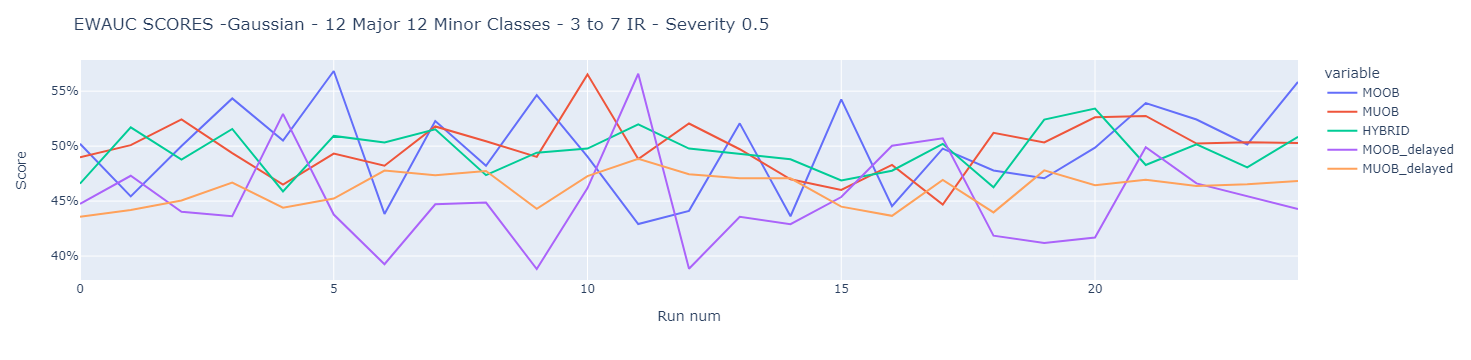

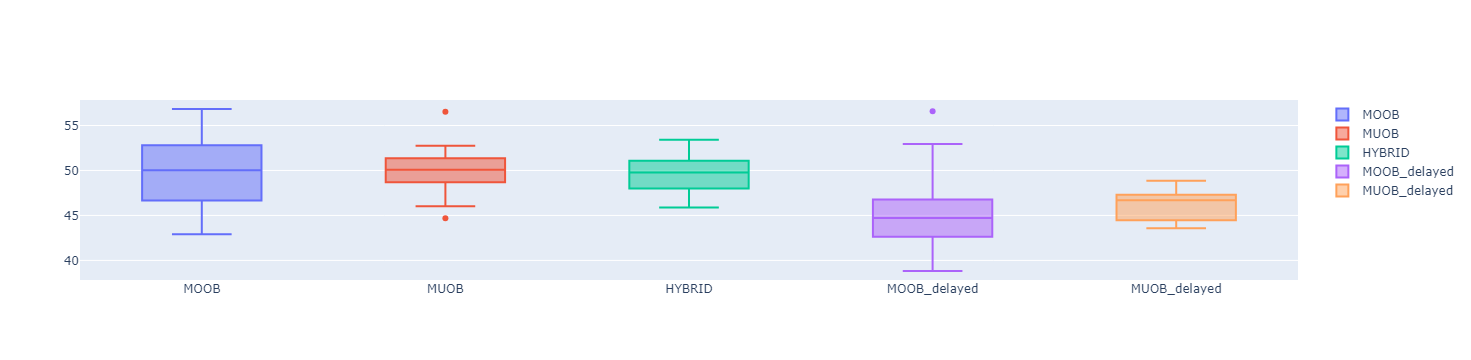

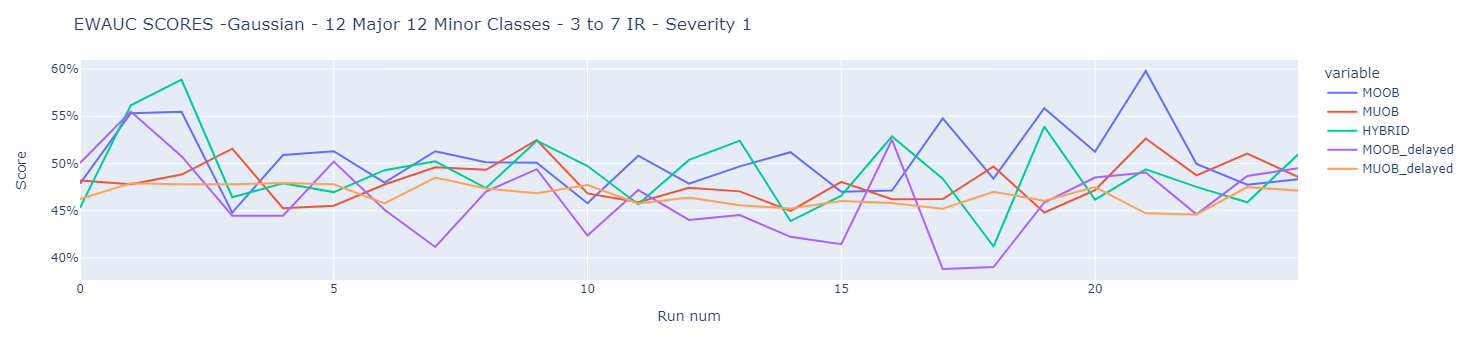

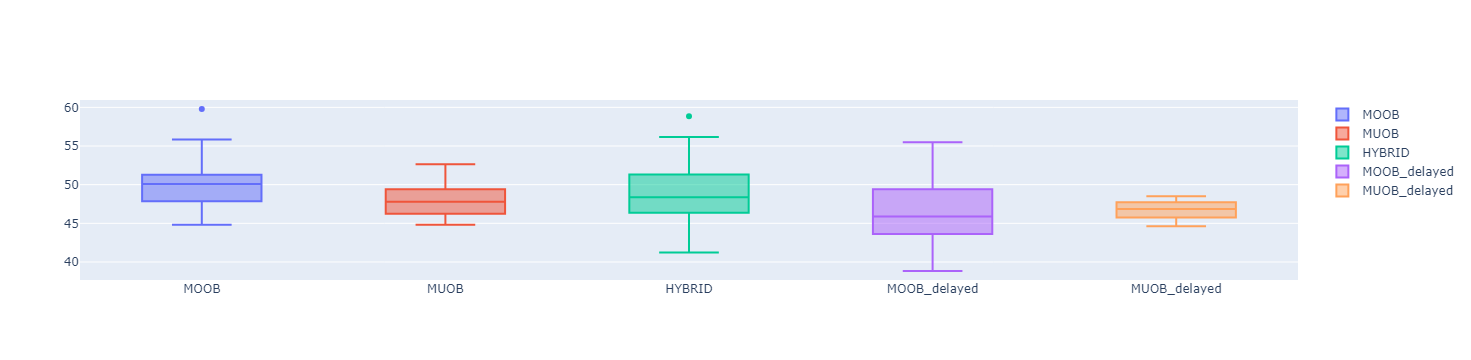

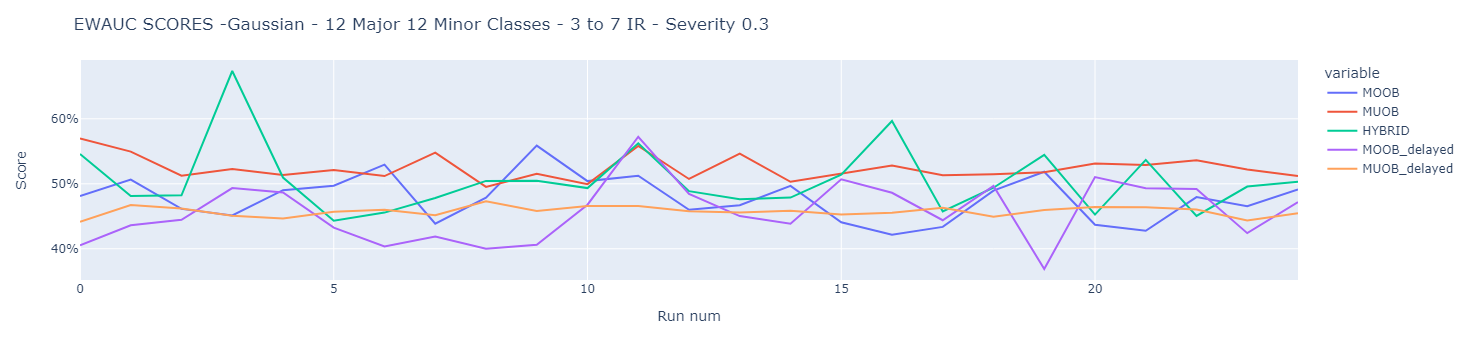

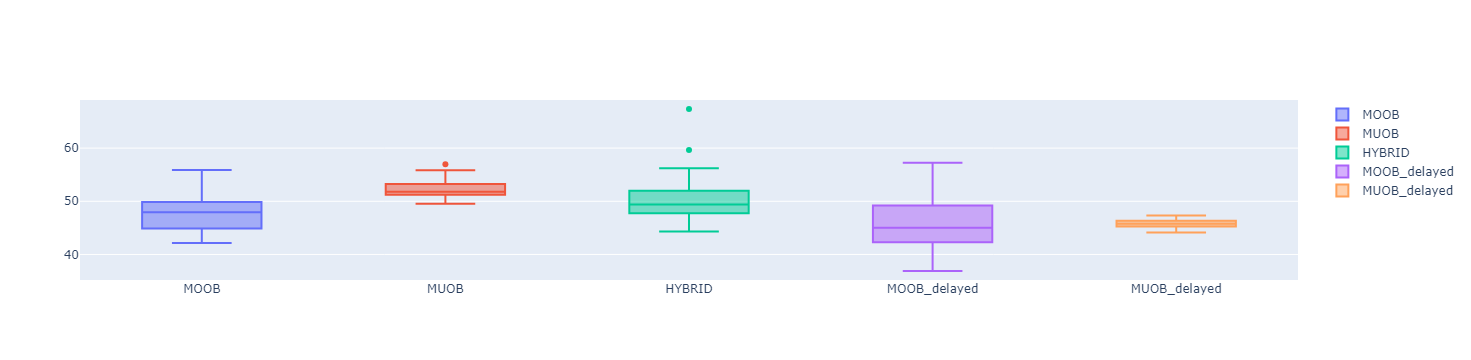

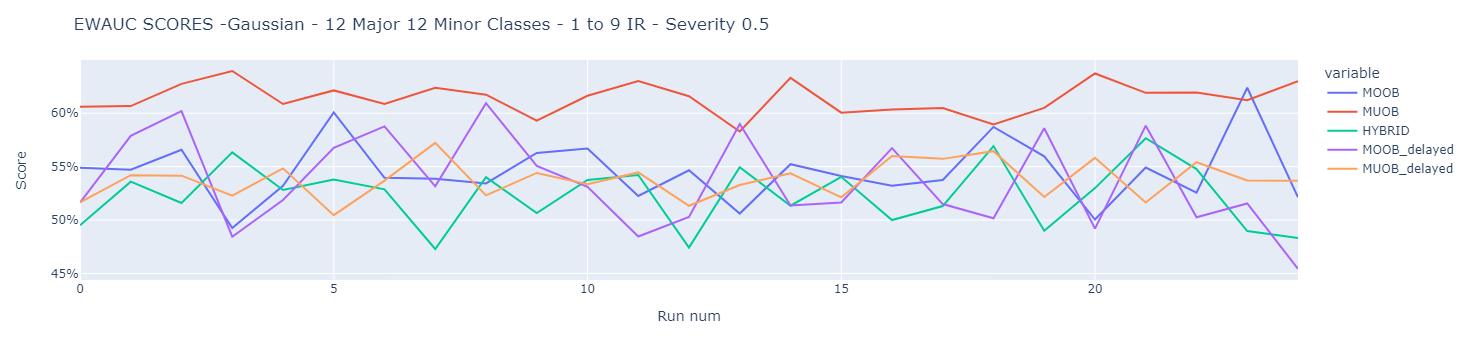

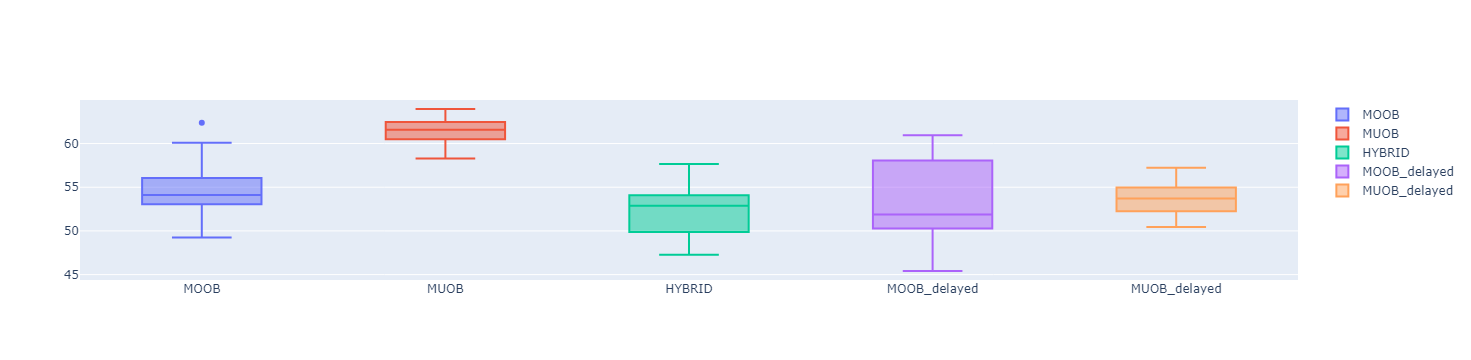

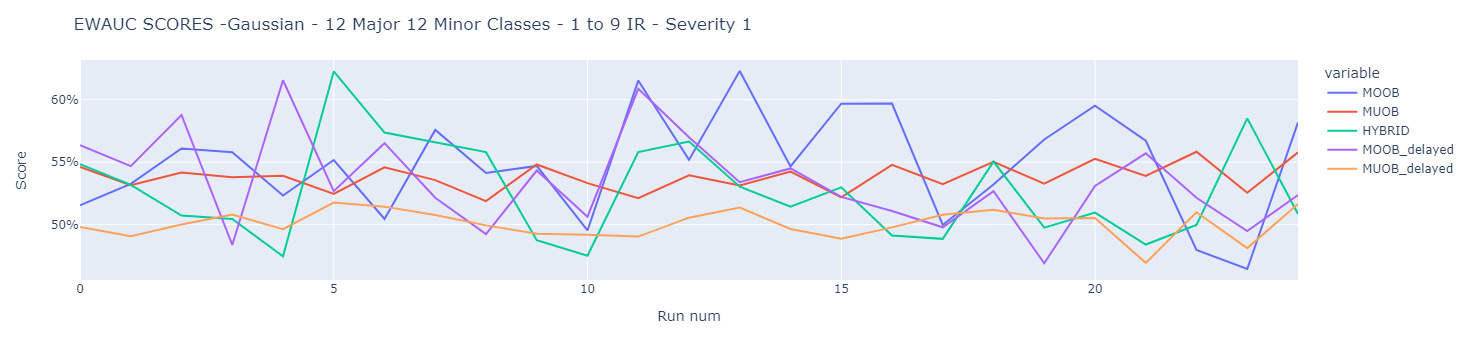

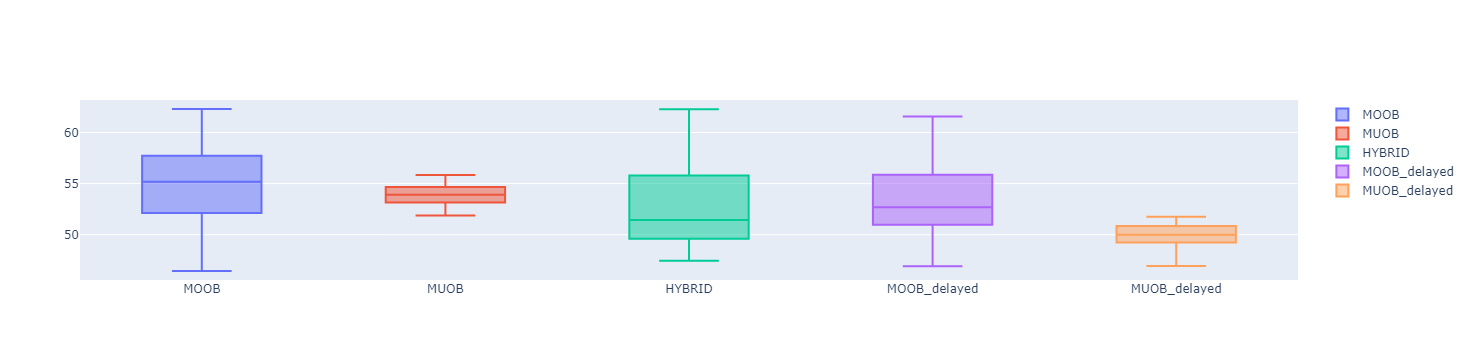

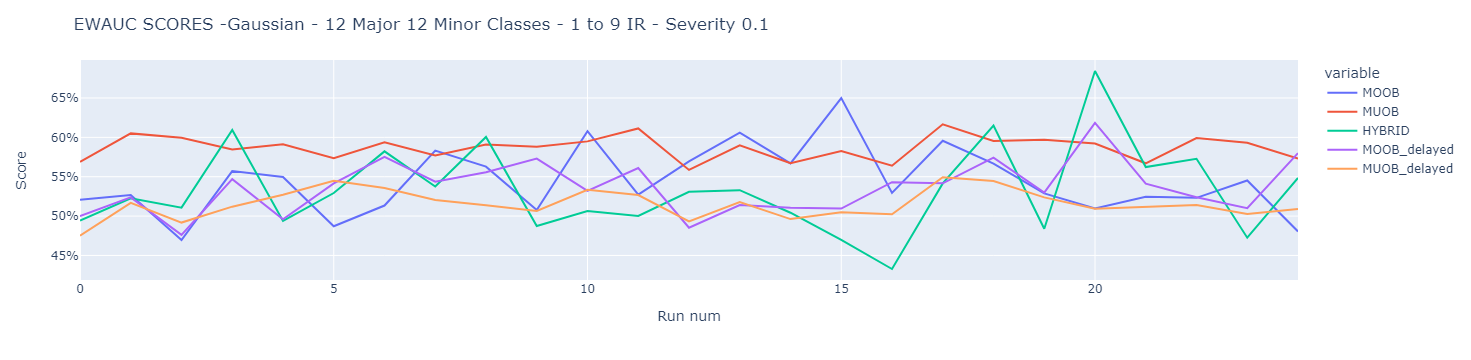

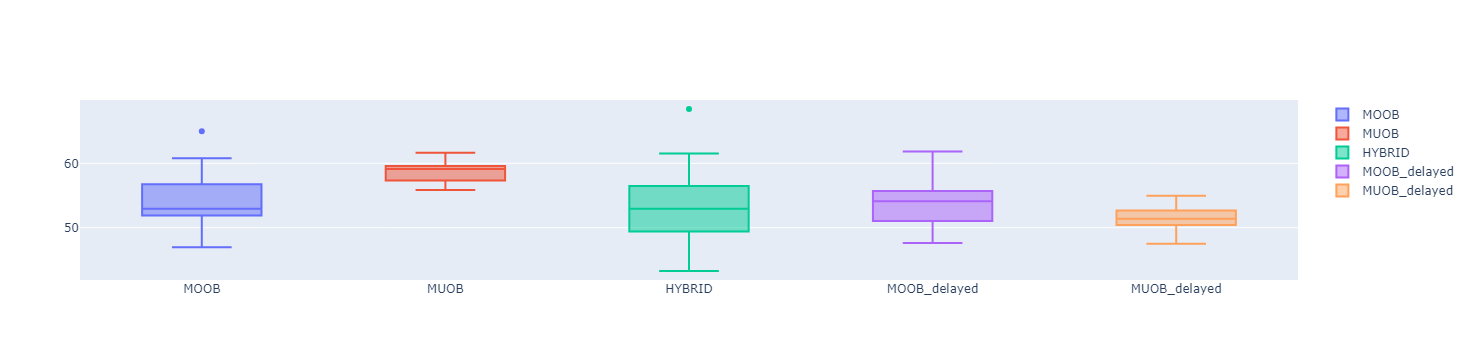

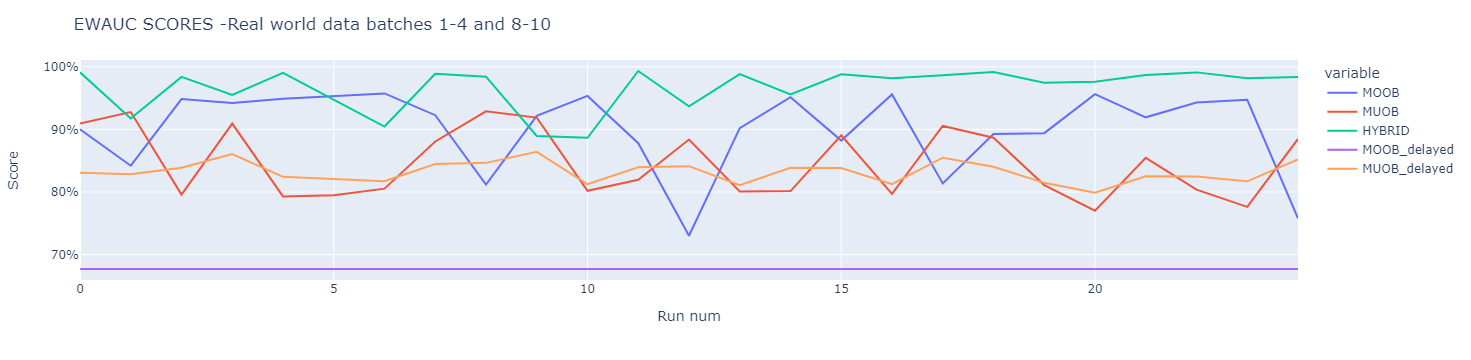

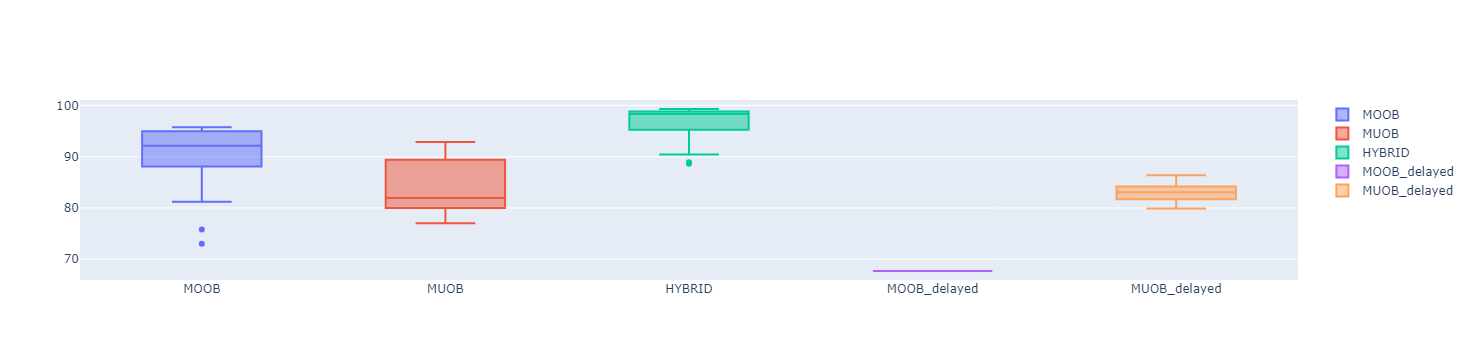

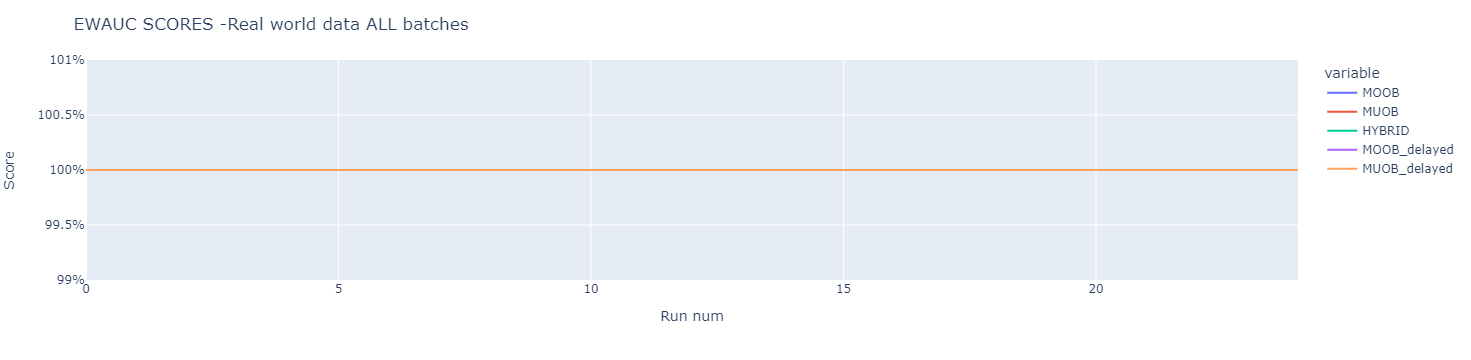

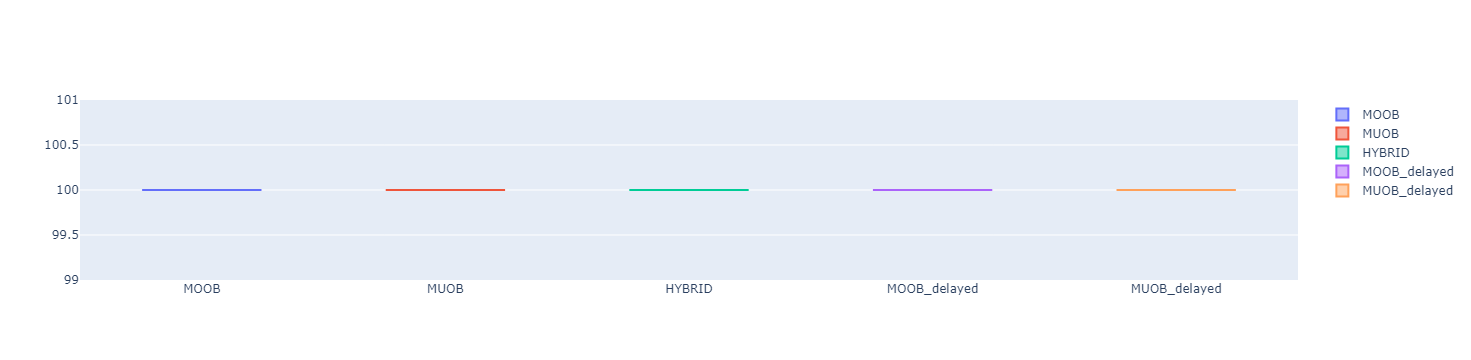

                  MOOB       MUOB     HYBRID MOOB_delayed MUOB_delayed
3/7 Sev 0.5  50.012081   50.09213  49.773287    44.711433    46.685214
3/7 Sev 1    50.088434  47.806133  48.384943     45.87209    46.852312
3/7 Sev 0.3  47.953234  51.779804  49.396145     45.02736    45.797686
1/9 Sev 0.5  54.126153  61.588772   52.86954    51.874142    53.705656
1/9 Sev 1    55.174514  53.904974  51.436767    52.681464    50.006874
1/9 Sev 0.1  52.942484  59.106961  52.929506    54.109007    51.389898
RW batches   92.157862  81.951924  98.375479    67.697764    83.054079
RW ALL           100.0      100.0      100.0        100.0        100.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


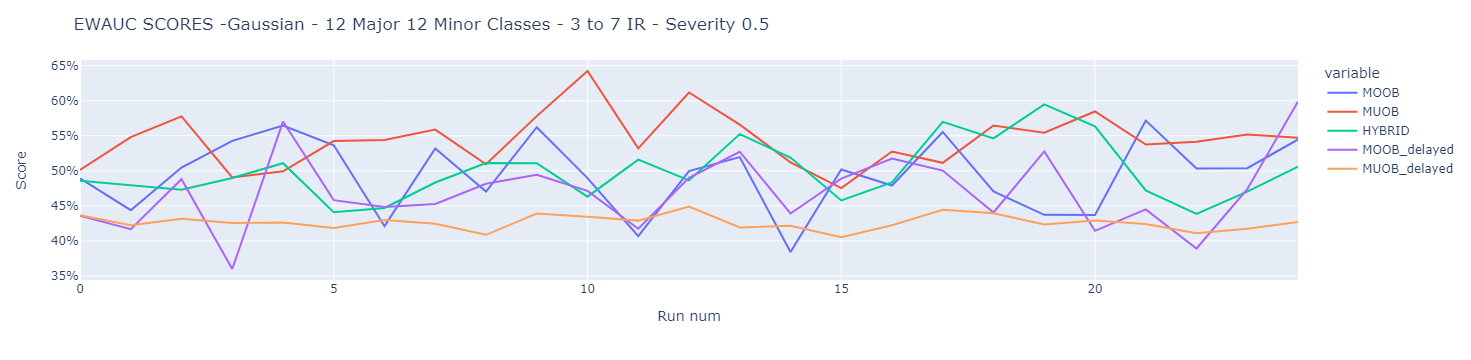

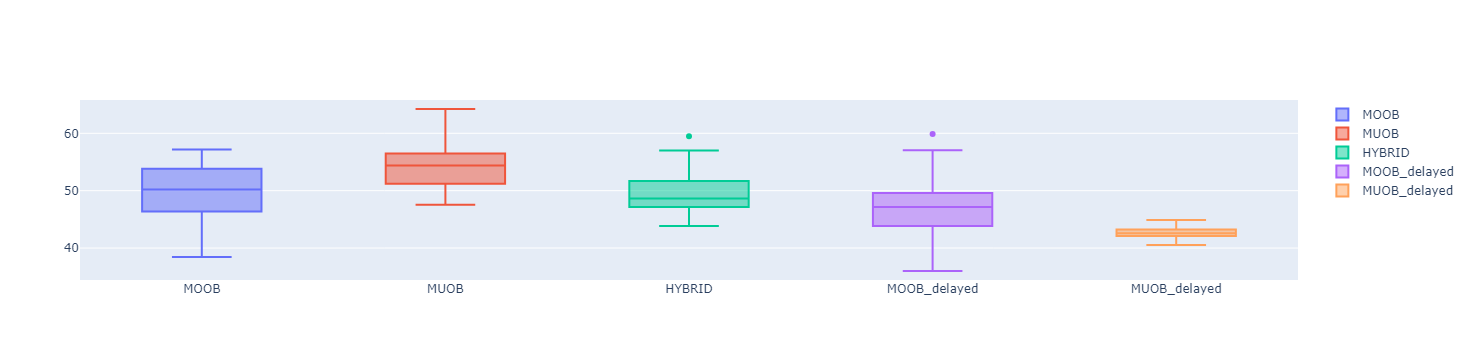

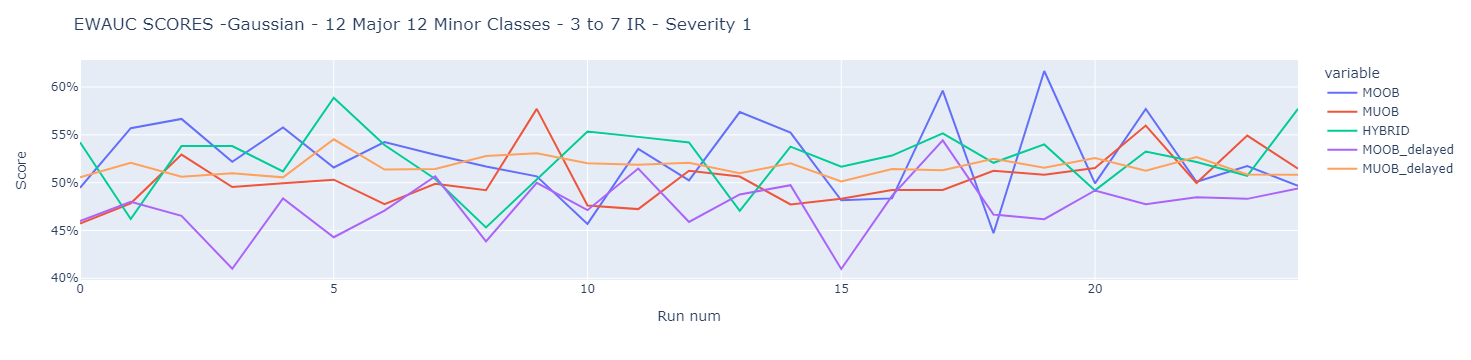

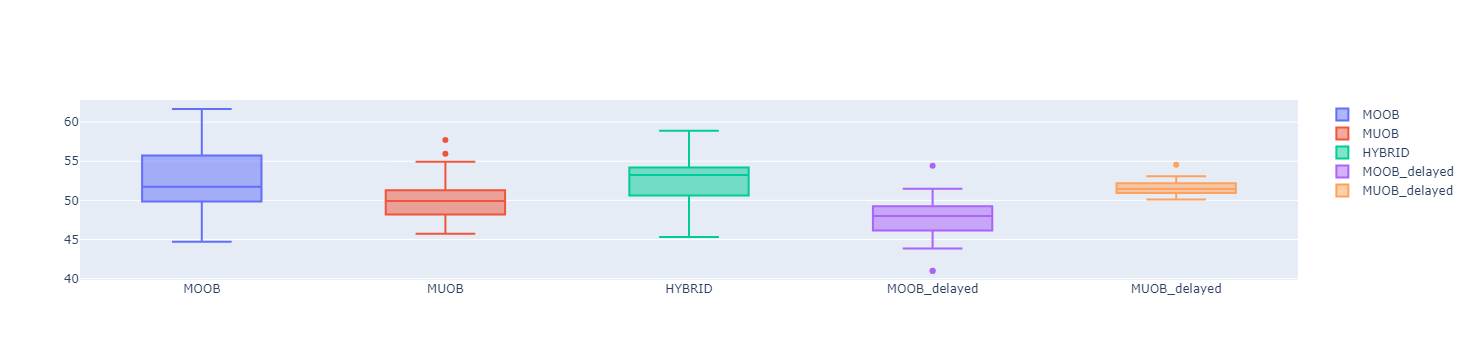

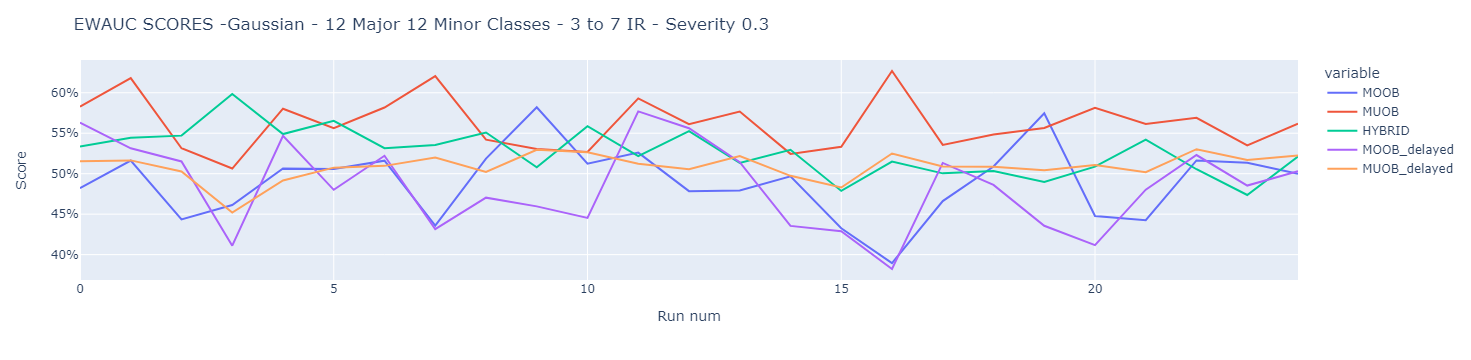

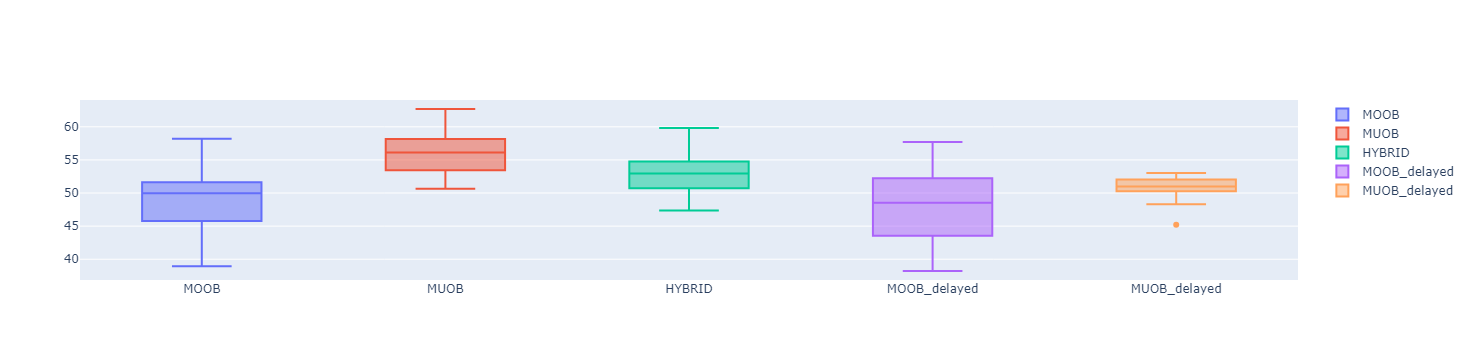

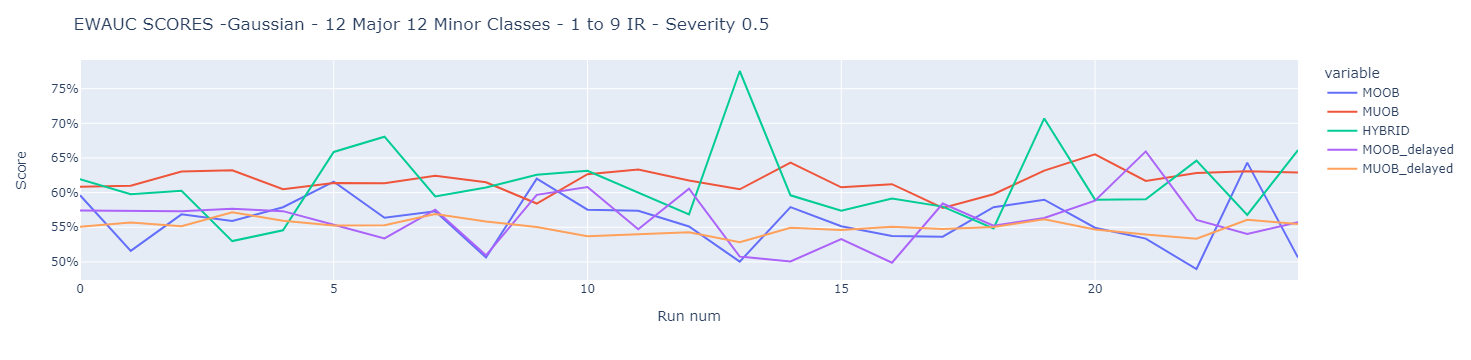

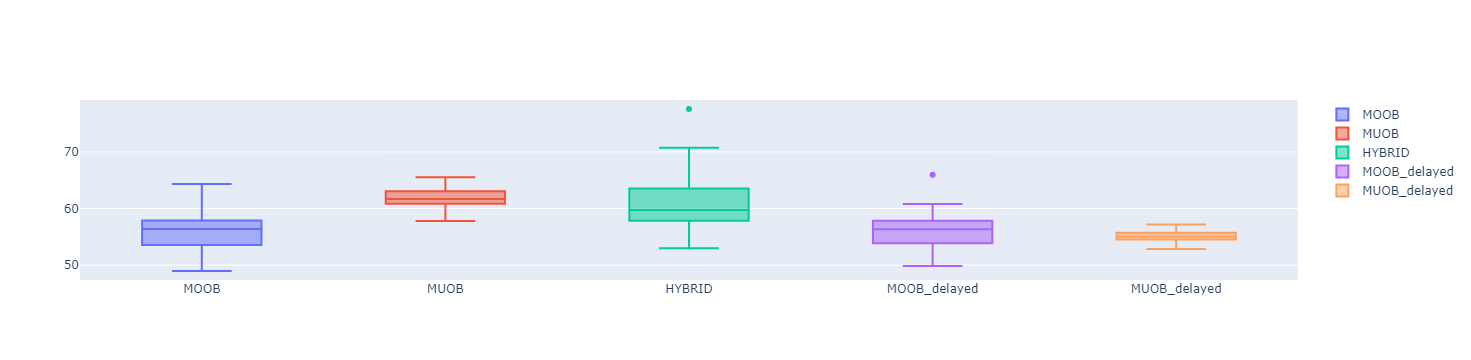

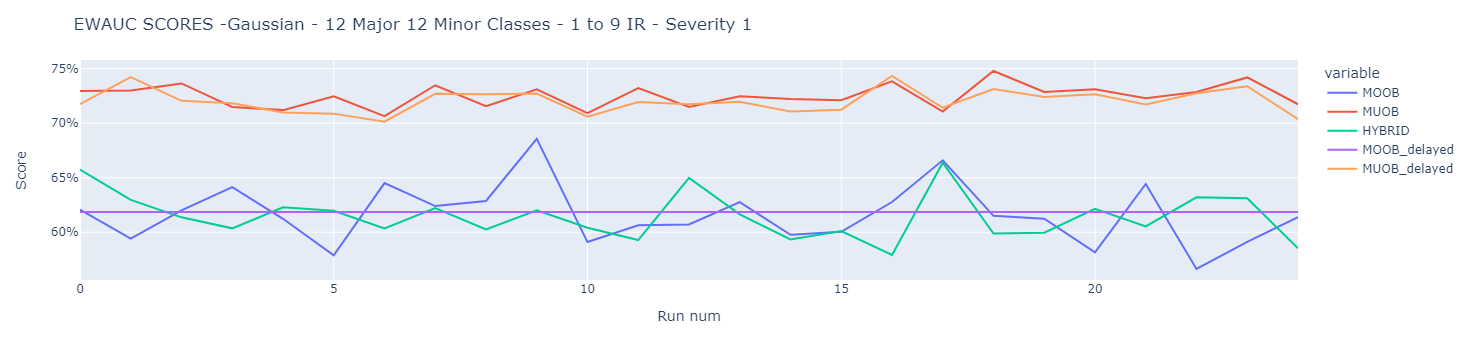

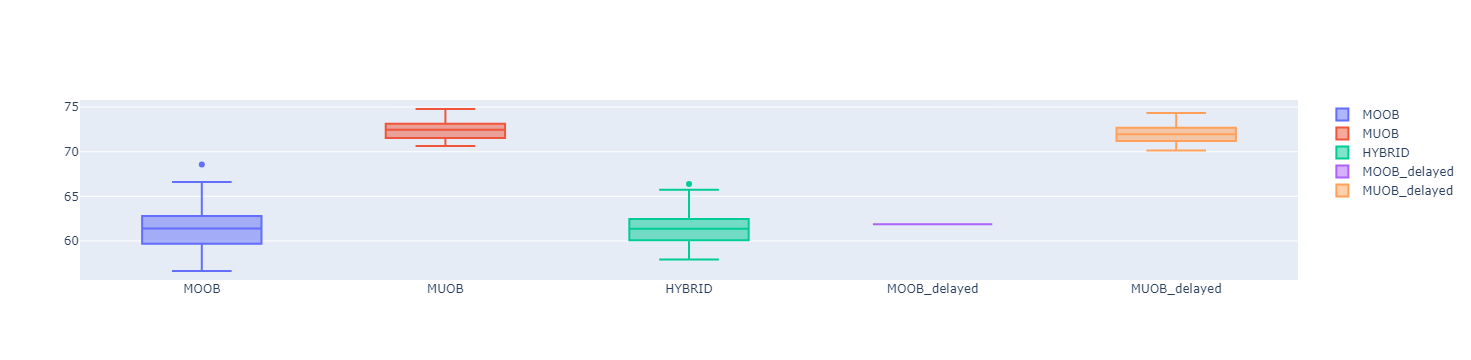

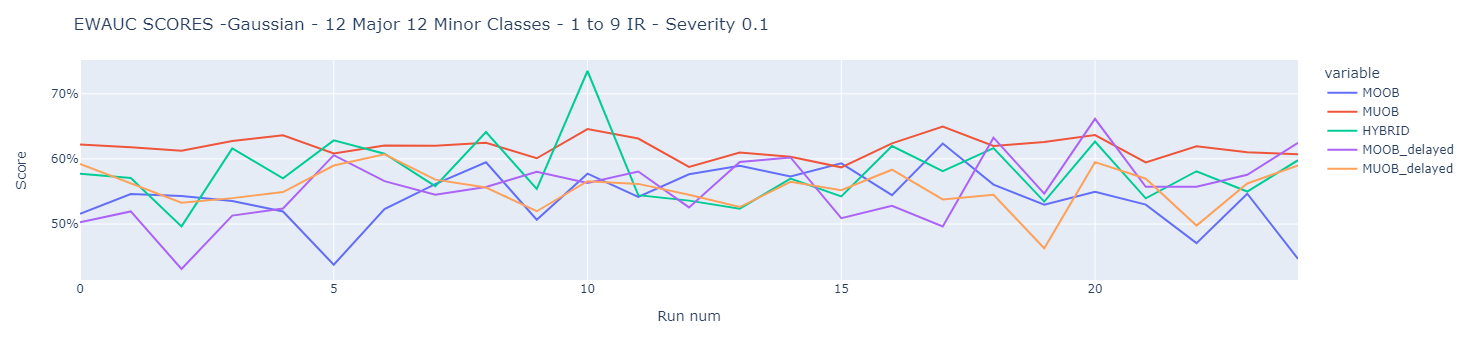

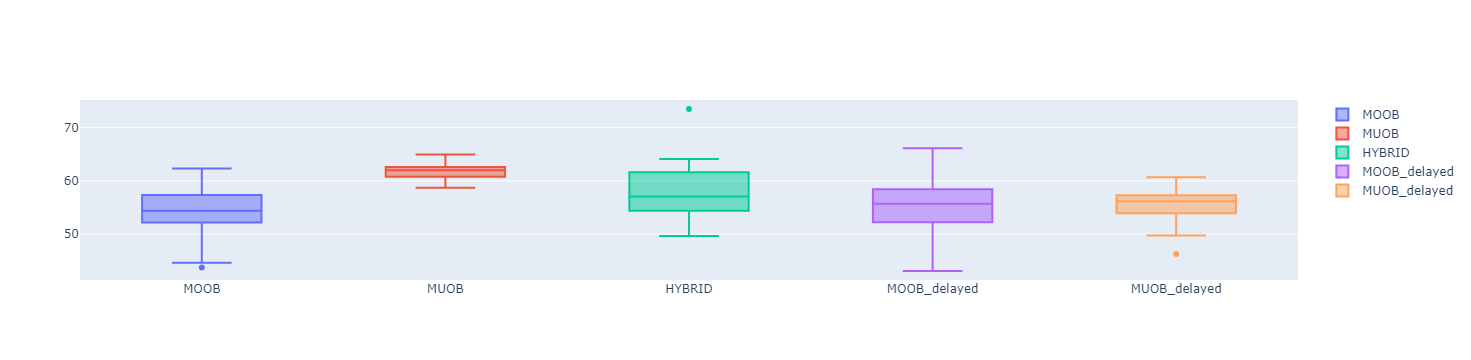

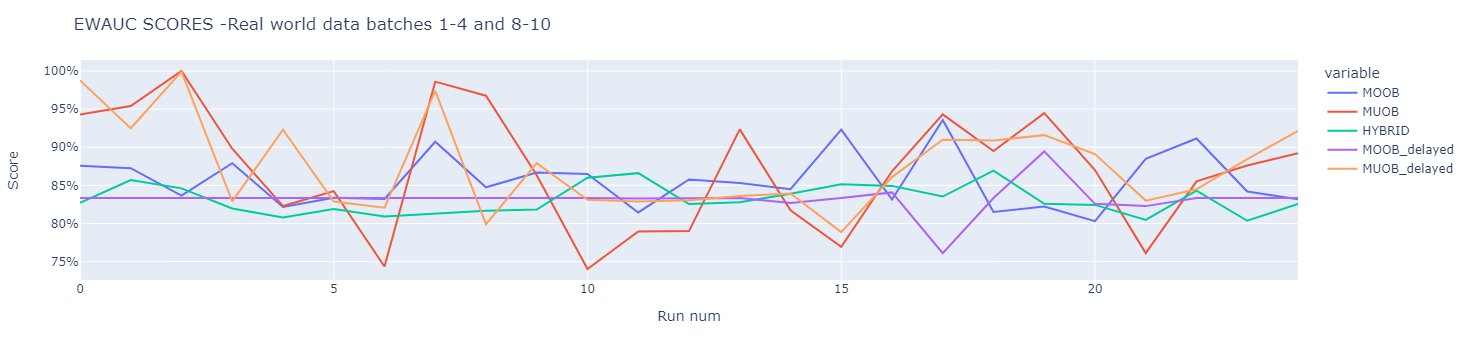

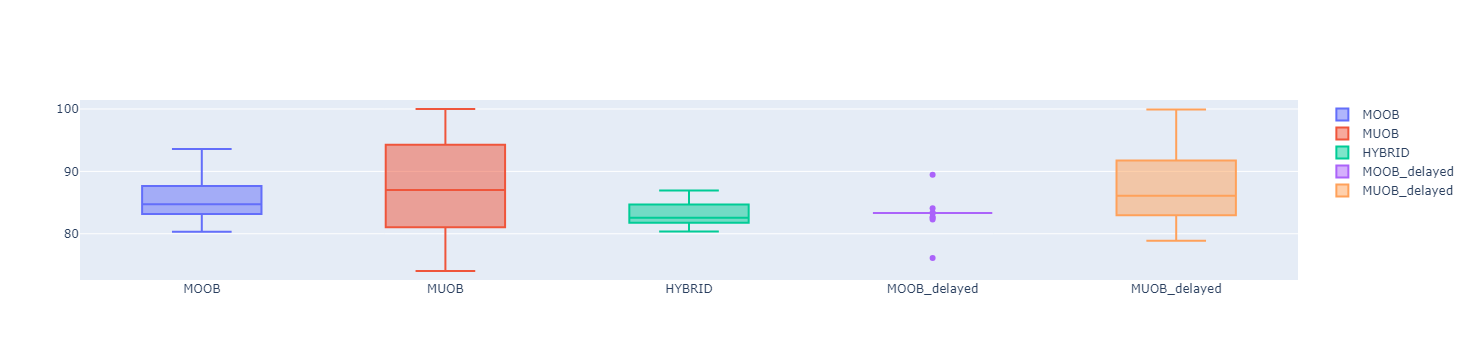

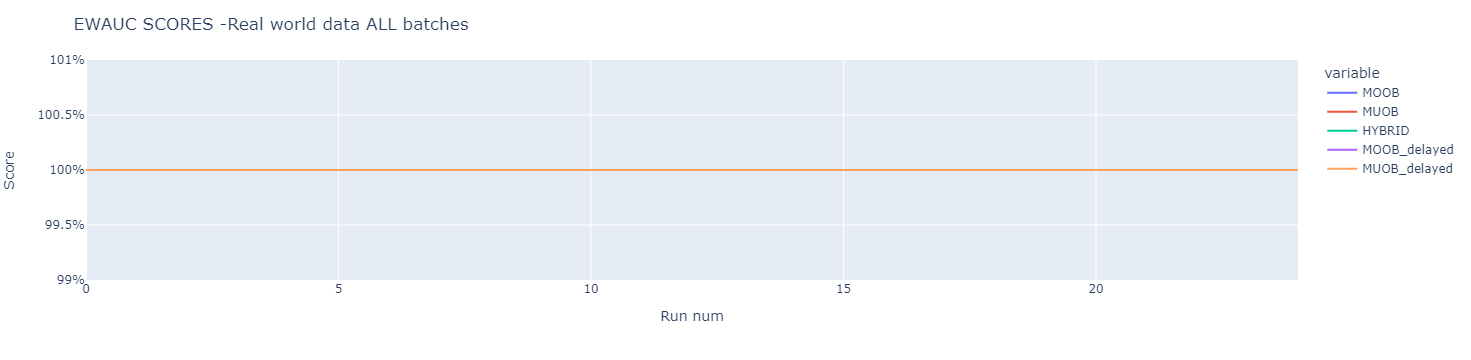

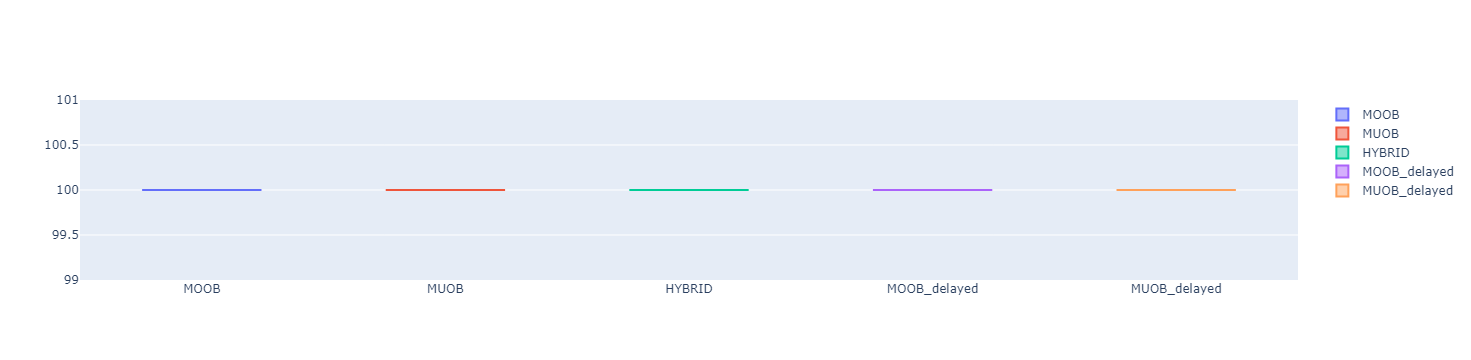

                  MOOB       MUOB     HYBRID MOOB_delayed MUOB_delayed
3/7 Sev 0.5  50.193941  54.407492  48.631096    47.140374    42.568192
3/7 Sev 1    51.745535  49.929727  53.252605    47.997936    51.438762
3/7 Sev 0.3  49.982041  56.121404  52.959529    48.535815    50.967309
1/9 Sev 0.5  56.369259  61.691758  59.755721    56.347895    55.057262
1/9 Sev 1    61.394969   72.47259  61.367432    61.863746    71.947043
1/9 Sev 0.1  54.428716  61.986621  57.071244    55.720157    56.170816
RW batches   84.746073  87.010891  82.576229    83.333333    86.085281
RW ALL           100.0      100.0      100.0        100.0        100.0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [37]:
for source in sources:
    display(HTML("<h1>Source folder: "+source+"</h1>"))
    medianasFinal = pd.DataFrame(columns=modesTested)
    temp = list()
    for xax in range(0,numFiles):
        medianas = list()
        ewauc_scores = scores(modesTested[0]+filesToRead[xax],modesTested[0],"ewauc")
        medianas.append(statistics.median(ewauc_scores.iloc[:,0]))
        for xaxa in range(1,numModes):
            temp = scores(modesTested[xaxa]+filesToRead[xax],modesTested[xaxa],"ewauc")
            ewauc_scores.insert(len(ewauc_scores.columns),temp.columns[0],temp.iloc[:,0].tolist())
            medianas.append(statistics.median(ewauc_scores.iloc[:,xaxa]))
        
        plot_scores(ewauc_scores,"EWAUC SCORES -" + titlesToPrint[xax])
        box_show(ewauc_scores)
        

        medianasFinal.loc[len(medianasFinal),:]=medianas
    medianasFinal.index = rowNames
    print(medianasFinal)
    print ('-' * 200)

These tests were made in 10 runs and a 100 run batch will be ran to assert them more correctly.<br>
With these preemptive results we can see that it improves the performance for milder Imbalance Ratios compared to the baselines however gets worse at very Imbalanced Ratios